In [1]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
#이미지분석을 학습모델
resnet50=tf.keras.applications.resnet.ResNet50(
    weights='imagenet',
    input_shape=(224, 224, 3)
)

In [3]:
#분류할 이미지 사이즈와 형태 변경
file = '../data/dog.png'
image = np.array(Image.open(file))
image_resize = cv2.resize(image, (224, 224))
image_reshape = image_resize.reshape([1, 224, 224, 3])  #?, 크기, 크기, 채널

In [4]:
#이미지분류 예측
pred = resnet50.predict(image_reshape)

1/1 [==============================] - 1s 550ms/step


In [5]:
decoded_pred = tf.keras.applications.imagenet_utils.decode_predictions(pred)

In [6]:
for idx, pred in enumerate(decoded_pred[0]):
    print(f"{idx+1}위. {pred[1]}, {pred[2]*100:.2f}%")

1위. Siberian_husky, 37.08%
2위. Eskimo_dog, 23.64%
3위. white_wolf, 17.68%
4위. Cardigan, 12.10%
5위. Samoyed, 2.56%


In [7]:
def predict(file):
    image = np.array(Image.open(file))

    plt.imshow(image)
    plt.axis('off')
    plt.show()

    resnet50=tf.keras.applications.resnet.ResNet50(
        weights='imagenet',
        input_shape=(224, 224, 3)
    )   

    image_resize = cv2.resize(image, (224, 224))
    image_reshape = image_resize.reshape([1, 224, 224, 3])  

    pred = resnet50.predict(image_reshape)
    decoded_pred = tf.keras.applications.imagenet_utils.decode_predictions(pred)

    for idx, pred in enumerate(decoded_pred[0]):
        print(f"{idx+1}위. {pred[1]} ({pred[2]*100:.2f}%)")

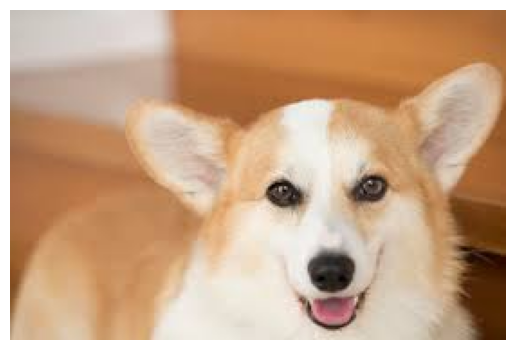

1/1 [==============================] - 1s 665ms/step
1위. Siberian_husky (37.08%)
2위. Eskimo_dog (23.64%)
3위. white_wolf (17.68%)
4위. Cardigan (12.10%)
5위. Samoyed (2.56%)


In [8]:
predict('../data/dog.png')